# Proyek Analisis Data: Bike Sharing
Nama : [Shakira Angelina Ika Putri]
Email: [mc254d5x0781@student.devacademy.id]
ID Dicoding: [MC254D5X0781]

## Menentukan Pertanyaan Bisnis

Pertanyaan 1 : Bagaimana pola penyewaan sepeda berdasarkan hari kerja vs. hari libur?

Pertanyaan 2 : Kapan jam sibuk (peak hours) penyewaan sepeda dalam sehari?

pertanyaan 3 : Bagaimana pengaruh faktor cuaca dan musim terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import streamlit as st

In [ ]:
# Membuat direktori output untuk menyimpan hasil visualisasi
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

### Data Wrangling

#### Gathering Data

In [104]:
# Membaca dataset Bike Sharing
day_data = pd.read_csv("day.csv")
hour_data = pd.read_csv("hour.csv")

In [ ]:
# Melihat beberapa sample data day
day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Melihat beberapa sample data hour
hour_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight :



#### Assessing Data

In [ ]:
# Menampilkan informasi dari data day
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Menampilkan informasi dari data hour
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Melakukan check adakah nilai yang hilang dari data day
day_data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Melakukan check adakah nilai yang hilang dari data hour
hour_data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Melakukan pengecekan untuk ada atau tidaknya data duplikat dari dataset
day_data.duplicated().sum()
hour_data.duplicated().sum()

0

Insight :


#### Cleaning Data

In [111]:
# Menghapus kolom yang tidak relevan (contoh: 'instant' karena hanya index)
day_data.drop(columns=['instant'], inplace=True)
hour_data.drop(columns=['instant'], inplace=True)

In [112]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])


In [113]:
# Menampilkan hasil akhir
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
<class '

In [114]:
# Menyimpan dataset yang sudah dibersihkan
day_data.to_csv('day_cleaned.csv', index=False)
hour_data.to_csv('hour_cleaned.csv', index=False)

Insight :

### Exploratory Data Analysis (EDA)

#### Explore

In [115]:
day_data.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [116]:
hour_data.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [117]:
# Univariate Analysis
print("\nDistribusi Jumlah Penyewaan Sepeda Harian:")
print(day_data['cnt'].describe())
print("\nDistribusi Jumlah Penyewaan Sepeda Per Jam:")
print(hour_data['cnt'].describe())


Distribusi Jumlah Penyewaan Sepeda Harian:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

Distribusi Jumlah Penyewaan Sepeda Per Jam:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


In [118]:
print("\nDistribusi Suhu (Day):")
print(day_data['temp'].describe())
print("\nDistribusi Suhu (Hour):")
print(hour_data['temp'].describe())


Distribusi Suhu (Day):
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

Distribusi Suhu (Hour):
count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64


In [119]:
print("\nDistribusi Kelembaban (Day):")
print(day_data['hum'].describe())
print("\nDistribusi Kelembaban (Hour):")
print(hour_data['hum'].describe())


Distribusi Kelembaban (Day):
count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64

Distribusi Kelembaban (Hour):
count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64


In [120]:
print("\nDistribusi Kecepatan Angin (Day):")
print(day_data['windspeed'].describe())
print("\nDistribusi Kecepatan Angin (Hour):")
print(hour_data['windspeed'].describe())


Distribusi Kecepatan Angin (Day):
count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

Distribusi Kecepatan Angin (Hour):
count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64


In [121]:
# Bivariate Analysis: Pola Penyewaan Sepeda Berdasarkan Hari Kerja vs. Hari Libur
print("\nRata-rata Penyewaan Berdasarkan Hari Kerja vs. Hari Libur:")
agg_workingday = day_data.groupby('workingday')['cnt'].mean().reset_index()
print(agg_workingday)

print("\nRata-rata Penyewaan Berdasarkan Musim:")
agg_season = day_data.groupby('season')['cnt'].mean().reset_index()
print(agg_season)

print("\nRata-rata Penyewaan Berdasarkan Jam:")
agg_hour = hour_data.groupby('hr')['cnt'].mean().reset_index()
print(agg_hour)



Rata-rata Penyewaan Berdasarkan Hari Kerja vs. Hari Libur:
   workingday          cnt
0           0  4330.168831
1           1  4584.820000

Rata-rata Penyewaan Berdasarkan Musim:
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921

Rata-rata Penyewaan Berdasarkan Jam:
    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


In [122]:
# Multivariate Analysis: Pola Penyewaan Berdasarkan Jam
print("\nInteraksi Penyewaan dengan Musim dan Hari Kerja:")
agg_multivariate = day_data.groupby(['season', 'workingday'])['cnt'].mean().reset_index()
print(agg_multivariate)

print("\nInteraksi Penyewaan dengan Cuaca dan Musim:")
agg_weather_season = day_data.groupby(['weathersit', 'season'])['cnt'].mean().reset_index()
print(agg_weather_season)


Interaksi Penyewaan dengan Musim dan Hari Kerja:
   season  workingday          cnt
0       1           0  2257.098361
1       1           1  2780.541667
2       2           0  5142.428571
3       2           1  4926.664062
4       3           0  5474.666667
5       3           1  5718.114504
6       4           0  4606.210526
7       4           1  4785.611570

Interaksi Penyewaan dengan Cuaca dan Musim:
    weathersit  season          cnt
0            1       1  2811.135135
1            1       2  5548.548673
2            1       3  5878.257353
3            1       4  5043.563107
4            2       1  2357.166667
5            2       2  4236.705882
6            2       3  5222.479167
7            2       4  4654.000000
8            3       1   934.750000
9            3       2  1169.000000
10           3       3  2751.750000
11           3       4  1961.600000


In [123]:
# Numerikal Analysis: Statistik Deskriptif dan Korelasi
print("\nKorelasi Antar Variabel Dataset Day:")
print(day_data.corr())


Korelasi Antar Variabel Dataset Day:
              dteday    season        yr      mnth   holiday   weekday  \
dteday      1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   


In [124]:
print("\nKorelasi Antar Variabel Dataset Hour:")
print(hour_data.corr())


Korelasi Antar Variabel Dataset Hour:
              dteday    season        yr      mnth        hr   holiday  \
dteday      1.000000  0.404452  0.865648  0.489808 -0.006161  0.014737   
season      0.404452  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.865648 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489808  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.006161 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014737 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001372 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003366  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014063 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136074  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137543  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.010196  0.150625 -0.083546  0.164411 -0.276498 -0.010588   

In [125]:
print("\nKorelasi Antar Variabel Dataset Hour:")
print(hour_data.corr())


Korelasi Antar Variabel Dataset Hour:
              dteday    season        yr      mnth        hr   holiday  \
dteday      1.000000  0.404452  0.865648  0.489808 -0.006161  0.014737   
season      0.404452  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.865648 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489808  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.006161 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014737 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001372 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003366  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014063 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136074  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137543  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.010196  0.150625 -0.083546  0.164411 -0.276498 -0.010588   

In [126]:
# Kategorikal Analysis: Distribusi Variabel Kategori
print("\nDistribusi Musim:")
print(day_data['season'].value_counts())
print("\nDistribusi Hari Kerja vs Hari Libur:")
print(day_data['workingday'].value_counts())
print("\nDistribusi Cuaca:")
print(day_data['weathersit'].value_counts())


Distribusi Musim:
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

Distribusi Hari Kerja vs Hari Libur:
workingday
1    500
0    231
Name: count, dtype: int64

Distribusi Cuaca:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


Insight :

### Visualization & Explanatory Analysis

##### Pertanyaan 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\33277131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=agg_workingday, palette='coolwarm')


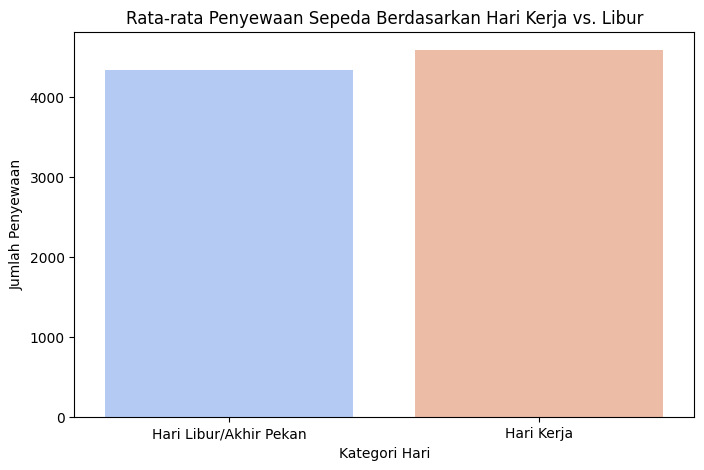

In [127]:
# Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan hari kerja vs. hari libur?
agg_workingday = day_data.groupby('workingday')['cnt'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='cnt', data=agg_workingday, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Hari Libur/Akhir Pekan', 'Hari Kerja'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja vs. Libur')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Penyewaan')
plt.savefig(f'{output_dir}/penyewaan_hari_kerja_vs_libur.png')
plt.show()

##### Pertanyaan 2

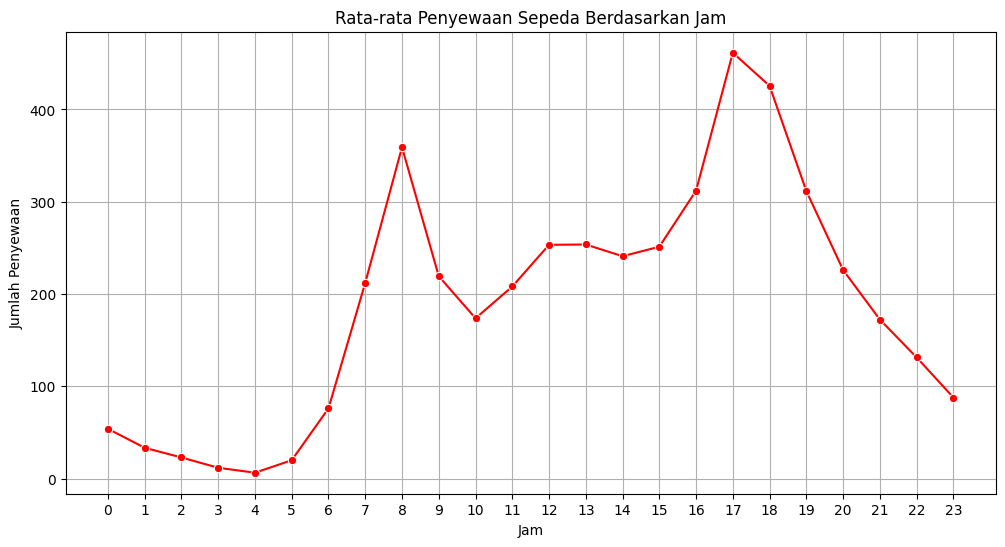

In [128]:
# Pertanyaan 2: Kapan jam sibuk (peak hours) penyewaan sepeda dalam sehari?
agg_hour = hour_data.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=agg_hour, marker='o', color='red')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True)
plt.savefig(f'{output_dir}/penyewaan_berdasarkan_jam.png')
plt.show()

##### Pertanyaan 3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\933398886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=agg_season, palette='coolwarm')


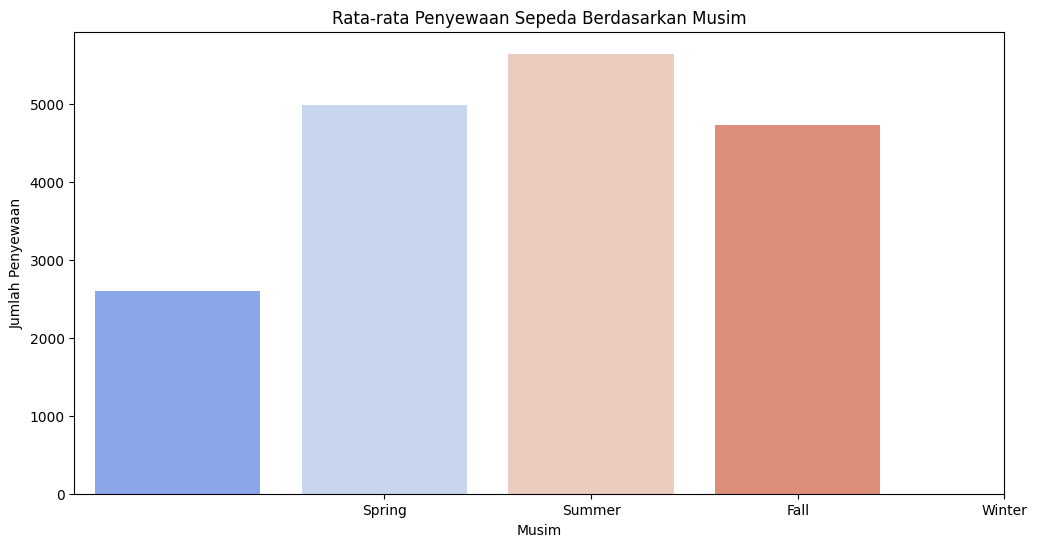

In [129]:
# Pertanyaan 3: Bagaimana pengaruh faktor cuaca dan musim terhadap jumlah penyewaan sepeda?
agg_season = day_data.groupby('season')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=agg_season, palette='coolwarm')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.savefig(f'{output_dir}/penyewaan_berdasarkan_musim.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\472738366.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\472738366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')


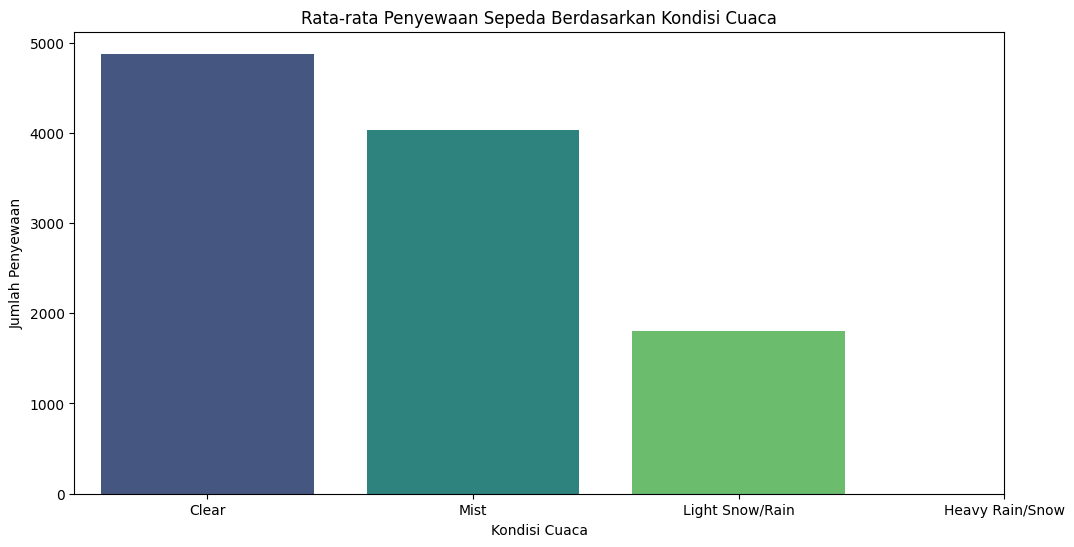

In [140]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.savefig(f'{output_dir}/penyewaan_per_cuaca.png')
plt.show()

#### Explanatory Analysis

##### Pertanyaan 1

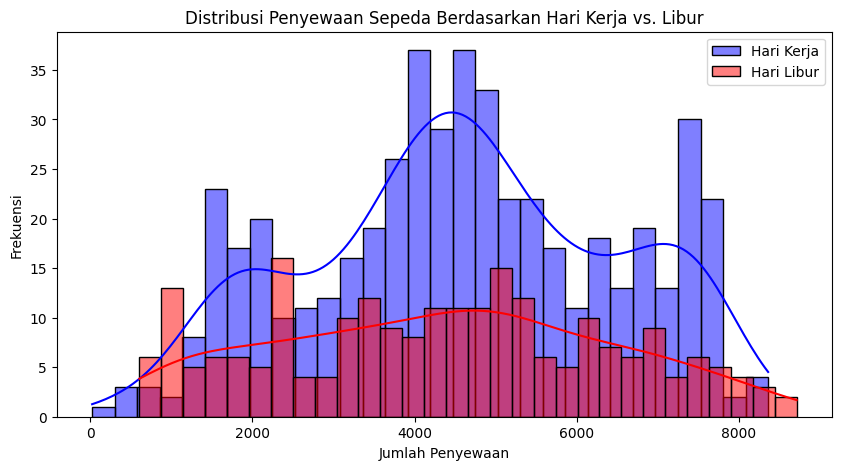

In [130]:
# Pola Penyewaan Sepeda Berdasarkan Hari Kerja vs. Hari Libur
plt.figure(figsize=(10, 5))
sns.histplot(day_data[day_data['workingday'] == 1]['cnt'], bins=30, color='blue', label='Hari Kerja', kde=True)
sns.histplot(day_data[day_data['workingday'] == 0]['cnt'], bins=30, color='red', label='Hari Libur', kde=True)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja vs. Libur')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.legend()
plt.savefig(f'{output_dir}/penyewaan_hari_kerja_vs_libur_histogram.png')
plt.show()

##### Pertanyaan 2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\1167361686.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_data, estimator='mean', ci=None, marker='o', color='red')


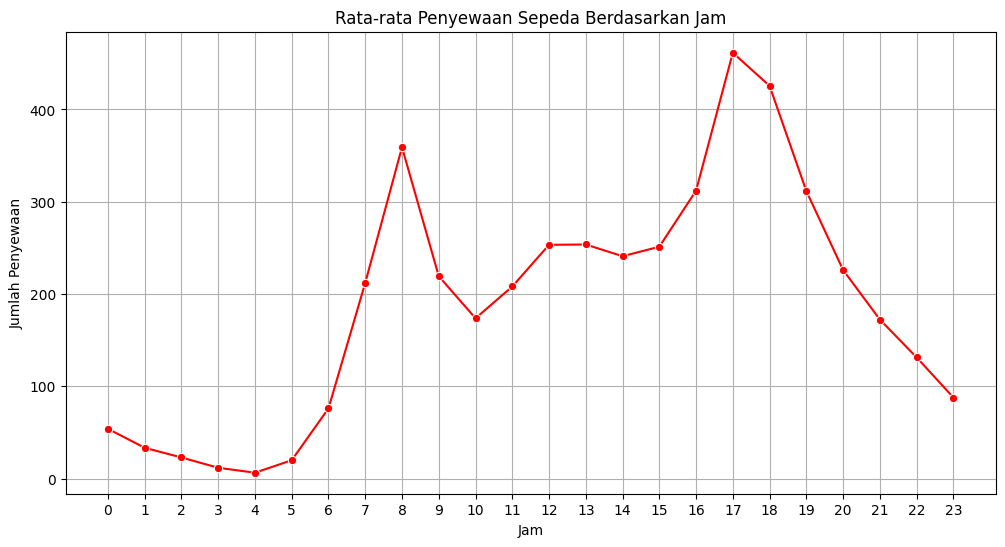

In [131]:
# Kapan Jam Sibuk (Peak Hours) Penyewaan Sepeda?
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_data, estimator='mean', ci=None, marker='o', color='red')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True)
plt.savefig(f'{output_dir}/jam_sibuk_penyewaan.png')
plt.show()

##### Pertanyaan 3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\407908560.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_data, ci=None, palette='coolwarm')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\407908560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_data, ci=None, palette='coolwarm')


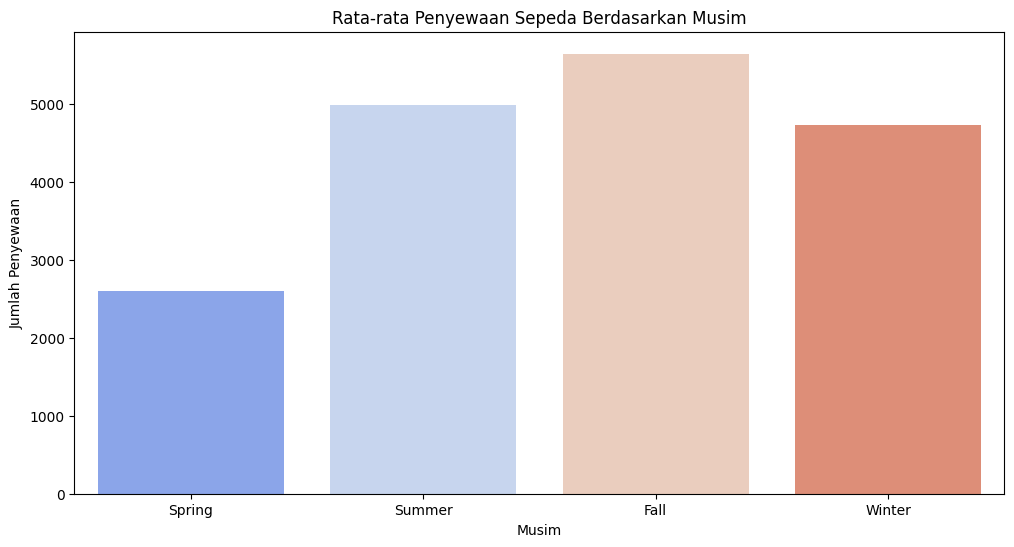

In [132]:
# Pengaruh Faktor Cuaca dan Musim Terhadap Penyewaan Sepeda
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=day_data, ci=None, palette='coolwarm')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.savefig(f'{output_dir}/penyewaan_per_musim.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\472738366.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29764\472738366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')


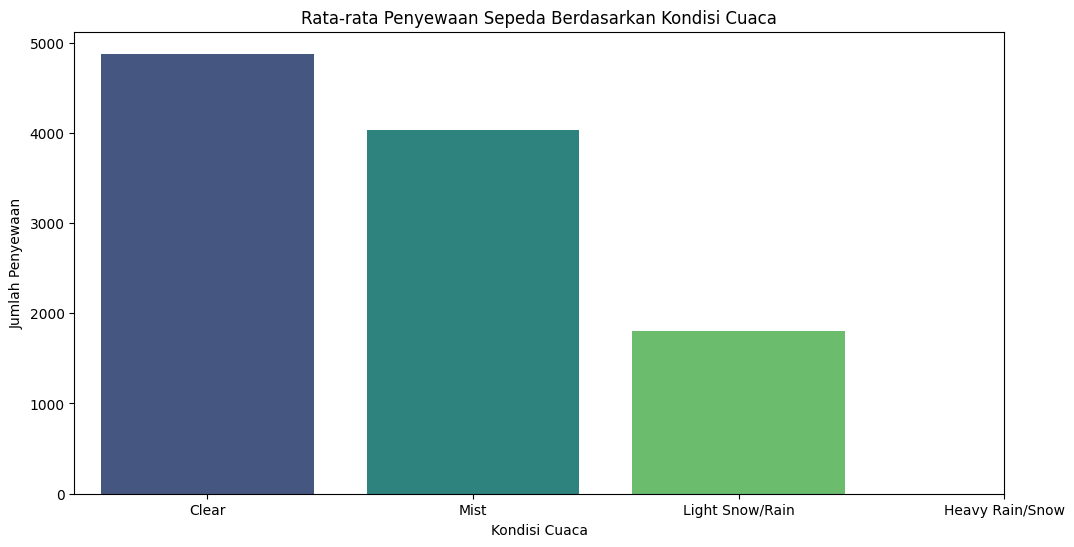

In [133]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.savefig(f'{output_dir}/penyewaan_per_cuaca.png')
plt.show()

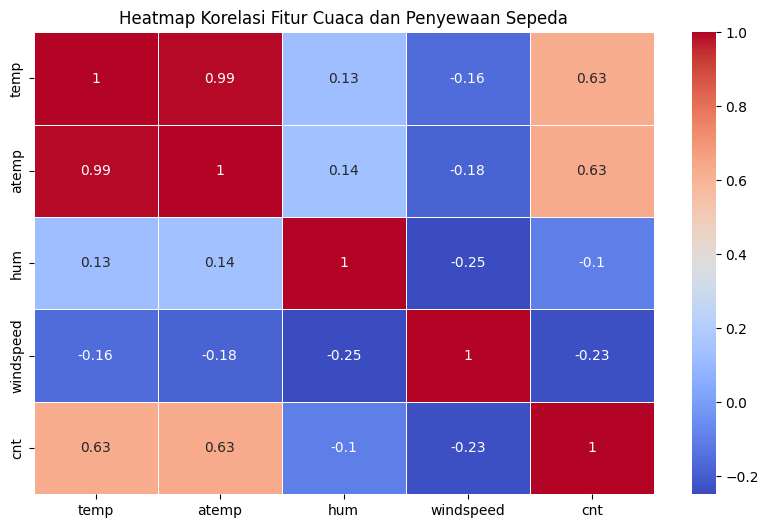

In [134]:
# Korelasi antara variabel cuaca dan penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.heatmap(day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Cuaca dan Penyewaan Sepeda')
plt.savefig(f'{output_dir}/heatmap_korelasi.png')
plt.show()

Insight :

## Conclusion

* Conclusion Pertanyaan 1

* Conclusion Pertanyaan 2

* Conclusion Pertanyaan 3